# Data Science Challenge Supplemental

### Survival Analysis Summary
A survival analysis is a method for analyzing data where the main dependent variable we are interested in is the time between defined initial and final events for individuals of a population.  A key feature of this kind of data is that it is often *censored*, meaning that we may not actually observe the event, and we may know only that it occured after some time when we stopped tracking the individual (right censored), before the time we started tracking (left censored), or during some period of time during which we lost sight the individual (interval censored).  

Survival analysis derives its name from the application of this technique to life expectancy modeling, but for the purpose of this assignment we would like to use it to analyze the time it takes for a customer to convert to a Gx drug.  In this scenario, their first purchase of the drug is the initial event and the date they convert to the drug is the final event, and because some customers may never be converted, their final event may not be observed, which means it is right censored.  Therefore, the conversion time has all the characteristics of a 'survival' variable and may be appropriately modeled using survival analysis methods.

### Survival Function and Hazard Function
Survival analysis is based on two related concepts the survival function and the hazard function.  The survival function, *S(t)*, describes the probability that the final event has not occured before time *t* (i.e., the individual is still 'alive' at time *t*).  The hazard function, $\lambda(t)$, is the instantaneous probability of observing the final event at *t*, given that the final event has not been observed before t (i.e., it is the probability that the individual will 'die' at time *t*, given that they have survived up to *t*).  

Mathematically, the survival function and hazard function are related by:
$$ \lambda (t)=-\frac{d}{dt}log S(t) $$

and solving for the survival function gives

$$ S(t)=exp[-\int_{0}^{t}\lambda({t}')d{t}'] $$

The argument in the exponential the cumulative hazard function and denoted $\Lambda(t)$.  Building a survival model generally involves fitting an approximation to $\Lambda(t)$.  Because $\Lambda(t)$ can take any functional form, the curves described by the survival function are very flexible.

### Survival regression
In the simplest form a survival model is only a function of time *t*, but in practice we would like to be able to include customer information as features into the model.  One approach is to use Aalen's additive hazard model.  Under this approximation, the hazard function for any given individual can be expressed as a linear superposition of multiple hazard functions $l_{i}(t)$, weighted by features $x_{i}$ of that individual:

$$\lambda(t) = l_{0}(t)+x_{i}l_{i}(t)$$

The hazard functions $l_{i}(t)$ are found by a regression approach analogous to the method used to find coefficients of a linear model.

### Hyperparameter selection
The Aalen survival regression model does have one hyperparameter, **coef_penalizer**, which adds regularization to the linear regression process used in model training.  This means that developing a model should include a cross validation step to optimize the choice of **coef_penalizer**.  To facilitate this, the Lifelines package includes a k-fold cross validation routine.  For this particular application, it was found that the concordance score was insensitive to the choice of **coef_penalizer** over a wide range of values, as illustrated below: 

In [15]:
df_xformer = mck_df_xform_featured()
X = df_xformer.transform(train_df)

In [10]:
c_vals = [0.1,0.3,1,3,10,30]
mean_score = []
for c in c_vals:
    aaf = AalenAdditiveFitter(coef_penalizer=c, fit_intercept=True)
    scores = k_fold_cross_validation(aaf, X, 'lifetime', event_col='converted', k=3)
    mean_score.append(np.mean(scores))

 [-----------------100%-----------------] 5333 of 5333 complete in 17.4 sec
 [-----------------100%-----------------] 5334 of 5334 complete in 27.2 sec
 [-----------------100%-----------------] 5333 of 5333 complete in 28.4 sec
 [-----------------100%-----------------] 5333 of 5333 complete in 35.3 sec
 [-----------------100%-----------------] 5334 of 5334 complete in 18.1 sec
 [-----------------100%-----------------] 5333 of 5333 complete in 14.3 sec
 [-----------------100%-----------------] 5333 of 5333 complete in 20.0 sec
 [-----------------100%-----------------] 5334 of 5334 complete in 17.2 sec
 [-----------------100%-----------------] 5333 of 5333 complete in 24.5 sec
 [-----------------100%-----------------] 5333 of 5333 complete in 20.8 sec
 [-----------------100%-----------------] 5334 of 5334 complete in 19.5 sec
 [-----------------100%-----------------] 5333 of 5333 complete in 16.1 sec
 [-----------------100%-----------------] 5333 of 5333 complete in 25.2 sec
 [----------

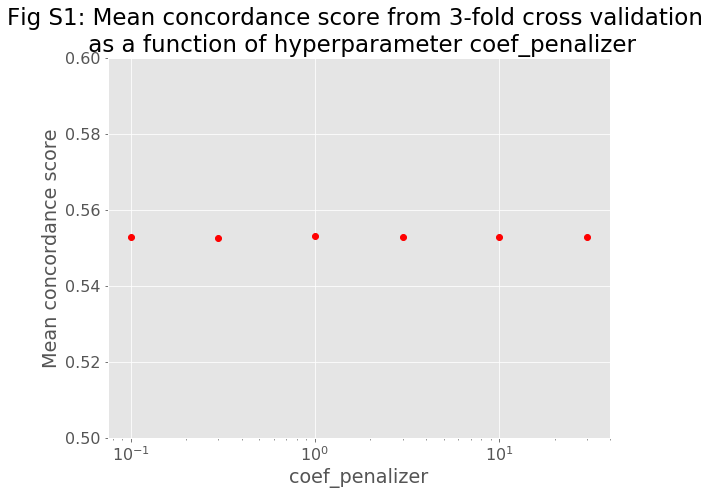

In [14]:
fig = plt.figure(figsize = (9, 7))
ax = fig.add_subplot(111)
ax.plot(c_vals, mean_score, 'ro')

ax.set_ylim([0.5,0.6])
plt.xscale('log')
plt.xlabel('coef_penalizer')
plt.ylabel('Mean concordance score')
plt.title('Fig S1: Mean concordance score from 3-fold cross validation \n as a function of hyperparameter coef_penalizer')
